In [3]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
df = pd.read_excel(r'อัตราดอกเบี้ยประกัน.xlsx',sheet_name='Sheet1')
df.rename(columns={'Unnamed: 0':'Time'},inplace = True)

In [3]:
df

,Time,อัตราดอกเบี้ย,อัตราดอกเบี้ยต่อปี
0,ม.ค. 49,0.0300,NaN
1,ก.พ. 49,0.0300,NaN
2,มี.ค. 49,0.0300,NaN
3,เม.ย. 49,0.0300,NaN
4,พ.ค. 49,0.0300,NaN
...,...,...,...
187,ส.ค. 64,0.0125,NaN
188,ก.ย. 64,0.0125,NaN
189,ต.ค. 64,0.0125,NaN
190,พ.ย. 64,0.0125,NaN


In [4]:
df = df.reset_index()

In [5]:
df.drop(columns=['index'])

,Time,อัตราดอกเบี้ย,อัตราดอกเบี้ยต่อปี
0,ม.ค. 49,0.0300,NaN
1,ก.พ. 49,0.0300,NaN
2,มี.ค. 49,0.0300,NaN
3,เม.ย. 49,0.0300,NaN
4,พ.ค. 49,0.0300,NaN
...,...,...,...
187,ส.ค. 64,0.0125,NaN
188,ก.ย. 64,0.0125,NaN
189,ต.ค. 64,0.0125,NaN
190,พ.ย. 64,0.0125,NaN


In [6]:
df['อัตราดอกเบี้ย'] = df['อัตราดอกเบี้ย']/12

In [7]:
df

,index,Time,อัตราดอกเบี้ย,อัตราดอกเบี้ยต่อปี
0,0,ม.ค. 49,0.002500,NaN
1,1,ก.พ. 49,0.002500,NaN
2,2,มี.ค. 49,0.002500,NaN
3,3,เม.ย. 49,0.002500,NaN
4,4,พ.ค. 49,0.002500,NaN
...,...,...,...,...
187,187,ส.ค. 64,0.001042,NaN
188,188,ก.ย. 64,0.001042,NaN
189,189,ต.ค. 64,0.001042,NaN
190,190,พ.ย. 64,0.001042,NaN


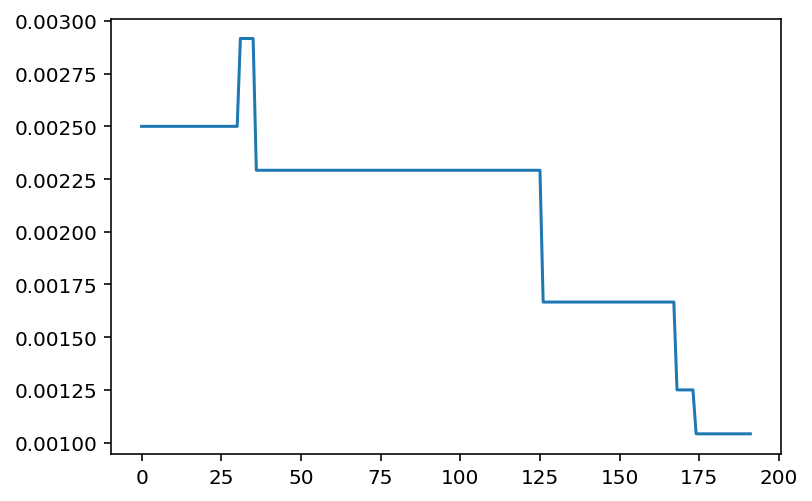

In [8]:
plt.plot(df['อัตราดอกเบี้ย'])

In [9]:
df[['อัตราดอกเบี้ย']].describe()

,อัตราดอกเบี้ย
count,192.000000
mean,0.002055
std,0.000478
min,0.001042
25%,0.001667
50%,0.002292
75%,0.002292
max,0.002917


In [10]:
df['SMA_4m'] = df['อัตราดอกเบี้ย'].rolling(window=4).mean()

In [11]:
df['ABS'] = abs(df['อัตราดอกเบี้ย']-df['SMA_4m'])

In [12]:
df.tail()

,index,Time,อัตราดอกเบี้ย,อัตราดอกเบี้ยต่อปี,SMA_4m,ABS
187,187,ส.ค. 64,0.001042,NaN,0.001042,3.035766e-18
188,188,ก.ย. 64,0.001042,NaN,0.001042,3.035766e-18
189,189,ต.ค. 64,0.001042,NaN,0.001042,3.035766e-18
190,190,พ.ย. 64,0.001042,NaN,0.001042,3.035766e-18
191,191,ธ.ค. 64,0.001042,NaN,0.001042,3.035766e-18


# อัตราการลู่เข้าสู่อัตราดอกเบี้ยระยะยาว

In [13]:
import sympy as sy
import scipy.special as special
import scipy.integrate as integrate
from sympy import Symbol, integrate, exp, pprint
import scipy.integrate as integrate
import scipy.special as special

# ทำตารางสุ่ม1000

In [14]:
column_list = []
index_list = []
year = 5

In [15]:
for i in range(1,(12*year)+1):
    column_list.append(i)
    
for i in range(1000):
    index_list.append(i+1)
    

In [16]:
data = pd.DataFrame(index = index_list,columns = column_list)

In [17]:
#parameter
K = 0.00398111798937544 #ค่าK
#e^kt
r_0 = 0.02/12 
r_st = df['อัตราดอกเบี้ย'].mean() #r*
#varance = (df['อัตราดอกเบี้ย'].std())**2 #อาจจะต้องปรับค่าอีกที
varance = 0.000077935122085164

In [18]:
r_st

0.002055121527777775

In [19]:
GG = np.random.normal(0,1,size = (1000,12*year))

In [20]:
rd = pd.DataFrame(data = GG,index = index_list,columns = column_list)
rd

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
1,1.233835,2.041589,-0.108678,0.073936,1.140678,1.418090,-0.583778,1.255876,0.549418,-1.265267,...,-0.171362,0.186203,1.049184,0.109071,0.367251,-0.935165,1.799328,1.002933,0.188457,-0.813880
2,0.020717,-0.619955,-0.968103,-0.847063,0.487843,-0.259908,-1.459976,1.301118,-0.224593,1.498853,...,0.247790,-0.984283,-1.005013,-0.720825,0.537534,0.908056,-1.152150,-0.677958,0.751035,-0.784393
3,-0.959995,1.831071,-0.260880,0.536471,-0.056919,1.010793,0.498979,0.845755,-2.595837,-1.472206,...,0.815677,-1.933829,1.194725,0.083237,-0.203741,0.363101,0.964369,-1.543776,-1.505036,-1.425413
4,-0.527339,0.723390,1.059766,1.247166,0.381630,0.040653,-0.502820,2.253509,2.647743,0.787720,...,-1.399386,1.594536,0.451737,-0.628615,0.575797,-0.370302,2.442732,-0.454137,0.963516,0.399268
5,-0.845583,1.034239,0.756346,-1.082753,-0.752515,0.829813,0.283540,-2.361242,0.620647,-0.435364,...,0.650728,0.195137,-1.549874,-0.054673,-1.165346,1.403183,0.048908,-0.822448,1.619823,-1.468962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.193258,-0.052020,1.257243,-1.279104,0.540012,2.566089,-1.485364,-0.767907,-0.362124,0.693936,...,0.764104,-0.014663,-1.974202,-1.027317,0.474363,-1.443314,-0.328617,0.786228,-0.777401,1.010258
997,0.028189,-1.315615,-0.537700,-0.613073,-0.095857,0.569653,-0.741407,-0.166258,0.249783,0.810258,...,0.777082,-0.425739,1.078796,1.159809,-1.416853,0.843066,1.086640,0.898921,-1.970574,0.138621
998,-0.620609,0.902033,0.484302,-0.029181,1.178328,2.529772,-0.831596,-1.080767,0.079039,-0.950085,...,-0.196235,0.870845,-0.632412,0.052012,0.613595,0.930132,-1.229614,0.287852,-0.479253,-0.791512
999,-0.056428,-0.432739,-1.970326,1.409887,-0.655972,0.858810,0.562859,-0.838169,-0.649479,0.278195,...,0.802243,-0.344762,-0.059912,0.011845,0.335475,1.125871,0.712021,1.713333,-1.418304,0.479291


In [21]:
integrate = (np.exp(K*1.010050)/K)-(1/K)
e_kt = math.exp(-K*(1/12*year))
R = (r_0*e_kt)+(r_st*(1-e_kt))+(varance*e_kt*integrate)

In [22]:
R

0.0017460566194711059

In [23]:
#R คือ อัตราดอกเบี้ย ณ t
def r_t(c,t,d):
    integrate = (np.exp(K*d.iloc[c,t])/K)-(1/K)
    e_kt = math.exp(-K*(t/12*year))
    R = (r_0*e_kt)+(r_st*(1-e_kt))+(varance*e_kt*integrate)
    return R

In [24]:
for y in range(1000):
    for x in range(len(column_list)):
        data.iloc[y,x] = r_t(y,x,rd)

In [25]:
interest

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
1,0.00176306,0.00182681,0.00165951,0.00167433,0.00175775,0.00177979,0.00162552,0.00176814,0.00171409,0.00157552,...,0.0016853,0.00171152,0.00177394,0.00170715,0.00172614,0.00163413,0.00182938,0.00177297,0.00171564,0.00164546
2,0.00166828,0.00161913,0.0015929,0.00160302,0.00170704,0.0016498,0.00155818,0.00177164,0.00165452,0.00178785,...,0.00171537,0.00162783,0.00162706,0.00164798,0.00173829,0.00176525,0.00161949,0.00165371,0.00175554,0.00164754
3,0.00159199,0.0018103,0.0016477,0.00171024,0.00166483,0.00174816,0.00170905,0.00173641,0.00147318,0.00155972,...,0.00175619,0.00156022,0.00178439,0.0017053,0.00168544,0.00172639,0.00176975,0.00159259,0.00159608,0.00160244
4,0.00162561,0.00172368,0.00175045,0.00176555,0.0016988,0.00167302,0.00163175,0.00184553,0.0018765,0.001733,...,0.00159748,0.00181273,0.0017311,0.00165455,0.00174103,0.00167421,0.00187546,0.00166954,0.00177063,0.00173112
5,0.00160088,0.00174795,0.00172679,0.00158481,0.00161106,0.00173412,0.0016924,0.0014901,0.00171958,0.00163902,...,0.00174432,0.00171216,0.0015883,0.00169546,0.0016171,0.00180064,0.0017046,0.00164349,0.00181733,0.00159938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.00168173,0.00166326,0.00176586,0.00156965,0.00171109,0.00186923,0.00155624,0.00161209,0.00164396,0.00172578,...,0.00175248,0.00169713,0.00155818,0.00162618,0.00173378,0.00159816,0.0016778,0.00175755,0.00164735,0.00177442
997,0.00166886,0.00156522,0.00162623,0.00162111,0.00166182,0.00171395,0.00161339,0.00165835,0.00169101,0.00173474,...,0.00175341,0.00166772,0.00177606,0.00178233,0.00159927,0.00176061,0.00177847,0.00176556,0.00156335,0.00171268
998,0.00161836,0.00173762,0.00170561,0.00166633,0.00176068,0.00186639,0.00160645,0.00158807,0.00167787,0.00159961,...,0.00168351,0.00176065,0.00165361,0.00170307,0.00174373,0.00176683,0.00161401,0.00172213,0.00166841,0.00164704
999,0.00166227,0.00163367,0.0015155,0.00177824,0.00161852,0.00173637,0.00171399,0.00160669,0.0016219,0.00169379,...,0.00175522,0.00167351,0.00169449,0.00170021,0.00172387,0.00178081,0.00175177,0.00182361,0.00160218,0.00173679


In [26]:
premium = pd.DataFrame(index = index_list,columns = column_list)

In [27]:
for y in range(1000):
    for x in range(len(column_list)):
        premium.iloc[y,x] = random.randint(10,30)

In [28]:
premium

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
1,21,26,17,14,18,10,15,13,27,22,...,11,26,20,12,24,18,17,28,21,13
2,25,12,18,10,28,22,10,17,24,19,...,21,21,13,29,10,29,20,26,21,25
3,16,20,18,22,26,12,10,18,23,13,...,11,29,22,28,16,19,13,28,28,22
4,29,20,13,26,24,21,10,24,20,28,...,12,26,21,18,11,22,28,20,16,18
5,11,10,24,18,11,28,30,27,21,22,...,30,17,15,17,20,22,12,27,19,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,22,23,17,14,19,30,10,26,14,23,...,19,12,10,29,10,18,11,12,15,11
997,17,29,26,12,21,10,13,10,29,12,...,10,28,25,20,29,10,21,19,22,22
998,24,28,29,28,19,26,29,30,19,30,...,10,27,29,25,12,10,15,20,26,24
999,16,19,13,22,24,21,20,19,28,21,...,20,25,27,19,17,11,15,29,15,11


In [29]:
premium.iloc[0].sum()

1167

In [13]:
life_ = pd.DataFrame()

In [14]:
for y in range(1000):
    life_.loc[y,'Start'] = random.randint(12,70)
    life_.loc[y,'End'] = random.randint(life_.loc[y,'Start'],90)
    
life_['n_month'] = (life_['End']-life_['Start'])*12


In [15]:
life_

,Start,End,n_month
0,59.0,66.0,84.0
1,30.0,55.0,300.0
2,53.0,73.0,240.0
3,66.0,79.0,156.0
4,23.0,37.0,168.0
...,...,...,...
995,15.0,26.0,132.0
996,34.0,40.0,72.0
997,60.0,63.0,36.0
998,40.0,46.0,72.0


In [42]:
#i คือ row
#c คือ column

# คิดก้อน exp(sum(rk)*p(t))
def S(i,c,a,b):
    n = list(range(12*year,0,-1)) #ต้องย้อนกลับด้วย
    p = a.iloc[i,c]
    r = b.iloc[i,c]
    s = np.exp(n[c] * r)*p
    return s

In [43]:
Result = pd.DataFrame(index = index_list,columns = column_list)

In [44]:
for i in range(len(Result)):
    for c in range(len(Result.columns)):
        Result.iloc[i,c] = S(i,c,premium,data)

In [45]:
Result

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
1,23.3432,28.9589,18.7176,15.4019,19.8619,11.0284,16.3762,14.2772,29.5171,23.8407,...,11.187,26.4036,20.2859,12.1443,24.2499,18.1477,17.1249,28.1493,21.0722,13.0214
2,27.6319,13.2029,19.7422,10.9568,30.8088,24.0896,10.8778,18.6736,26.1563,20.8139,...,21.3633,21.3099,13.1703,29.3365,10.1048,29.2571,20.13,26.1293,21.0739,25.0412
3,17.6037,22.2544,19.8051,24.2527,28.5406,13.2111,10.9668,19.7352,24.8312,14.0763,...,11.1949,29.4101,22.3163,28.3362,16.1626,19.1647,13.0924,28.1341,28.0895,22.0353
4,31.9711,22.141,14.3892,28.7527,26.3953,23.024,10.9211,26.4662,22.0499,30.5874,...,12.1932,26.4277,21.2928,18.2097,11.1155,22.1849,28.2108,20.1004,16.0568,18.0312
5,12.109,11.0863,26.5282,19.7017,12.0386,30.802,32.8709,29.2188,22.9643,23.918,...,30.5279,17.264,15.1918,17.203,20.195,22.199,12.0821,27.1335,19.0692,26.0416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,24.3358,25.3715,18.8334,15.3103,20.9107,33.2483,10.8767,28.3191,15.2494,25.1161,...,19.3359,12.1847,10.1254,29.332,10.1046,18.1444,11.0741,12.0634,15.0495,11.0195
997,18.7904,31.8056,28.5717,13.1617,23.0481,10.9885,14.1834,10.9187,31.6655,13.11,...,10.1769,28.4234,25.3577,20.2511,29.2796,10.0884,21.1499,19.1009,22.0689,22.0377
998,26.4473,31.0229,32.0155,30.7899,20.9688,28.8107,31.628,32.6343,20.7322,32.55,...,10.1698,27.4312,29.3862,25.2998,12.1262,10.0887,15.0972,20.1036,26.0869,24.0396
999,17.6781,20.9225,14.1944,24.3468,26.2769,23.1044,21.9395,20.6888,30.4639,22.8947,...,20.3541,25.3794,27.3685,19.2275,17.1767,11.0984,15.1055,29.1591,15.0481,11.0191


In [ ]:
Result.iloc[0].mean() * 0.02 * 1000000

In [46]:
Conclude = pd.DataFrame()

In [47]:
for i in range(len(Result)):
    Conclude.loc[i,'Sum'] = Result.iloc[i].sum()

In [ ]:
Conclude.to_excel('/Users/oat/Desktop/test__.xlsx')

In [ ]:
Conclude.mean()

In [48]:
Conclude.describe()

,Sum
count,1000.000000
mean,1263.097313
std,50.434725
min,1087.789984
25%,1230.003555
50%,1263.040339
75%,1298.057092
max,1415.599832


In [ ]:
daf(5)

# Function

In [57]:
def daf(year):
    
    #input
    K = 0.00398111798937544
    r_0 = 0.02/12
    r_st = df['อัตราดอกเบี้ย'].mean() #r*
    #varance = (df['อัตราดอกเบี้ย'].std())**2 #อาจจะต้องปรับค่าอีกที
    varance = 0.000077935122085164
    rx = np.random.normal(0,1,size = (1000,year*12))
    
    
    #created dataframe
    index_list = list()
    column_list = list()
    
    for i in range(1,(12*year)+1):
        column_list.append(i)
    
    for i in range(1000):
        index_list.append(i+1)
        
    f1 = pd.DataFrame(data = rx,index = index_list,columns = column_list) #ตัวแปรสุ่ม
    
    interest = pd.DataFrame(index = index_list,columns = column_list) #อัตราดอกเบี้ย
    
    
    for y in range(1000):
        for x in range(len(column_list)):
            interest.iloc[y,x] = r_t(y,x,f1)
    
    premium = pd.DataFrame(index = index_list,columns = column_list) #เบี้ยแต่ละเดือน
    for y in range(1000):
        for x in range(len(column_list)):
            premium.iloc[y,x] = random.randint(10,30)
    
    life_t = pd.DataFrame() #อายุ N
    for y in range(1000):
        life_t.loc[y,'Start'] = random.randint(12,70)
        life_t.loc[y,'End'] = random.randint(life_.loc[y,'Start'],90)
    
    life_t['N'] = (life_['End']-life_['Start'])*12
    
    Result = pd.DataFrame(index = index_list,columns = column_list) #ผลลัพธิ์
    
    for i in range(len(Result)):
        for c in range(len(Result.columns)):
            p = premium.iloc[i,c]
            r = interest.iloc[i,c]
            n = list(range(12*year,0,-1))
            s = np.exp(n[c] * r)*p
            Result.iloc[i,c] = s
    
    Conclude = pd.DataFrame()
    for i in range(len(Result)):
        Conclude.loc[i,'Sum'] = Result.iloc[i].sum()
    
    
    return Conclude.mean()


In [50]:
daf(78)

,1,2,3,4,5,6,7,8,9,10,...,927,928,929,930,931,932,933,934,935,936
1,110.328,93.1876,82.9934,85.4305,144.67,51.8163,52.0072,80.8512,124.56,87.2913,...,12.2411,22.3967,26.4131,12.1664,26.3084,28.2801,22.1732,16.0971,29.1141,10.02
2,141.246,60.4407,60.335,132.228,109.198,66.7117,59.8891,82.8533,149.058,128.339,...,18.3606,11.1954,13.2059,28.385,24.2889,22.2152,12.0969,26.1544,25.0984,16.0317
3,85.3781,127.323,54.1247,133.626,60.6517,78.8702,130.86,97.1783,72.1838,103.303,...,19.38,20.3525,14.2248,13.1792,22.2608,12.1186,28.2238,19.113,18.0713,20.0397
4,47.3061,124.146,121.528,77.6047,122.247,109.369,82.4606,141.363,61.4121,88.0198,...,13.2607,17.3019,22.3534,29.3972,22.2617,12.1205,12.0941,21.1241,30.1207,18.0359
5,96.635,117.082,98.5704,111.297,96.9047,111.72,121.018,61.8494,101.463,69.2538,...,23.4565,26.4541,16.2522,13.1805,29.342,30.2967,15.1178,10.059,24.0951,25.0493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,142.456,113.415,105.892,82.6458,112.616,87.0163,53.2374,63.8462,96.959,78.904,...,13.2605,25.4451,18.2891,20.2816,26.3093,30.2966,14.1117,19.112,10.0391,24.0468
997,129.283,122.995,110.312,71.7356,53.9068,65.6172,119.575,78.8864,118.351,141.764,...,25.4971,26.4678,11.1742,11.1518,21.248,27.2737,27.2151,10.0595,17.0672,15.0298
998,149.581,114.032,112.289,102.693,83.3309,83.2911,114.426,97.5559,150.344,107.579,...,11.2179,25.444,29.461,20.2785,29.3474,20.1981,12.0948,20.1176,13.0522,13.026
999,54.5063,96.223,136.039,60.5223,127.946,55.4544,103.949,47.1683,54.8911,89.1827,...,29.5789,20.357,24.3848,24.3319,23.2764,21.2073,19.1508,27.1585,28.1105,14.0281


In [139]:
int(daf(5))

1261

In [137]:
type(daf(5))

pandas.core.series.Series

In [87]:
total = pd.DataFrame(index=(range(78)))

In [113]:
for i in range(len(total)):
    total.loc[i,'N'] = i+1

In [153]:
for i in range(len(total)): 
    total.loc[i,'mean'] = int(daf(int(total.loc[i,'N'])))
    print(i+1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78


In [154]:
total

,N,mean
0,1.0,242.0
1,2.0,491.0
2,3.0,743.0
3,4.0,999.0
4,5.0,1265.0
...,...,...
73,74.0,43347.0
74,75.0,44574.0
75,76.0,45782.0
76,77.0,47068.0


In [155]:
total.to_excel('/Users/oat/Desktop/output.xlsx')